In [22]:
import matplotlib
print(matplotlib.__version__)


3.10.5


In [18]:
import sys
print(sys.executable)


C:\Users\Lenovo\.conda\envs\tensorflow\python.exe


In [20]:
import sys
!{sys.executable} -m pip install matplotlib


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 2.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.7 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.6 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.4 MB/s eta 0:00:04
   ---------------- ----------

In [9]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [6]:
import sys
!{sys.executable} -m pip install pandas


In [5]:
import pandas as pd
print("Pandas version:", pd.__version__)


Pandas version: 2.3.2


In [10]:
!{sys.executable} -m pip install numpy scikit-learn seaborn


In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [5]:

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [9]:

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [11]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [14]:
# Initialising the ANN
classifier = Sequential()

In [15]:

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

C:\Users\Lenovo\.conda\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))


In [17]:
# Adding the output layer
classifier.add(Dense(units  = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [18]:

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5417 - loss: 0.7255 - val_accuracy: 0.7175 - val_loss: 0.5645
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7809 - loss: 0.5201 - val_accuracy: 0.7925 - val_loss: 0.4956
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7960 - loss: 0.4879 - val_accuracy: 0.7967 - val_loss: 0.4794
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7964 - loss: 0.4764 - val_accuracy: 0.7952 - val_loss: 0.4712
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7968 - loss: 0.4684 - val_accuracy: 0.7948 - val_loss: 0.4643
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7981 - loss: 0.4613 - val_accuracy: 0.7944 - val_loss: 0.4586
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7987 - loss: 0.4549 - val_accuracy: 0.7982 - val_loss: 0.4539
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8029 - loss: 0.4491 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


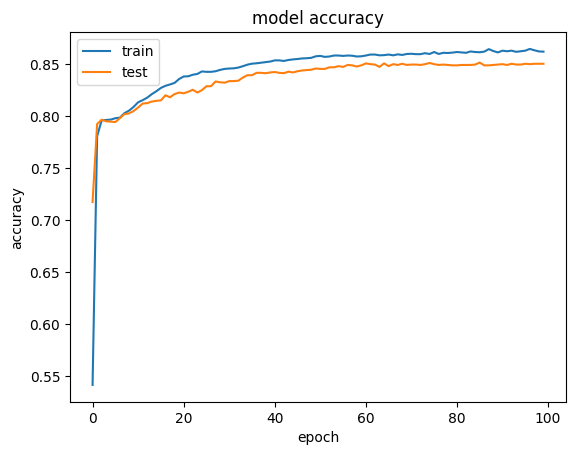

In [35]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


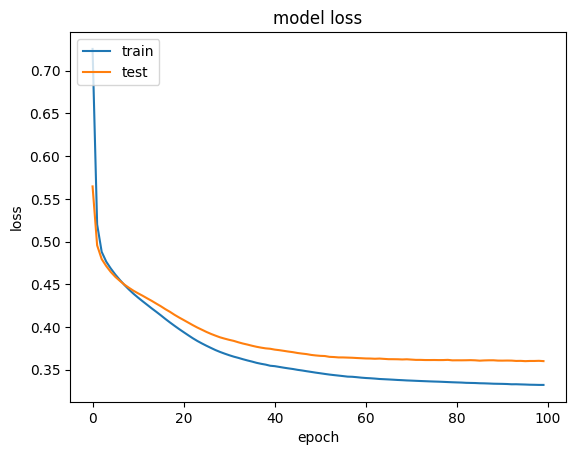

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)


In [53]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [55]:
print("Accuracy:", score)


Accuracy: 0.86
